# Workshop 2
# Part IV: Scipy
This is very short introduction to Scipy, much of content here is taken from the excellent [SciPy tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/general.html).

SciPy is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python. It adds significant power to the interactive Python session by providing the user with high-level commands and classes for manipulating and visualizing data.

SciPy is organized into subpackages covering different scientific computing domains. These are summarized in the following table:

| Subpackage | Description |
|---| ---|
| cluster    | Clustering algorithms |
| constants | Physical and mathematical constants |
| fftpack | Fast Fourier Transform routine |
| integrate| Integration and ordinary differential equation solvers |
| interpolate | Interpolation and smoothing splines |
| io | Input and Output |
| linalg | Linear algebra |
| ndimage | N-dimensional image processing |
| odr | Orthogonal distance regression |
| optimize | Optimization and root-finding routines |
| signal | Signal processing |
| sparse | Sparse matrices and associated routines |
| spatial | Spatial data structures and algorithms |
| special | Special functions |
| stats | Statistical distributions and functions |

These subpackages are called explicitly: 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

%matplotlib inline

In [8]:
interp1d?

Init signature:
interp1d(
    x,
    y,
    kind='linear',
    axis=-1,
    copy=True,
    bounds_error=None,
    fill_value=nan,
    assume_sorted=False,
)
Docstring:     
Interpolate a 1-D function.

`x` and `y` are arrays of values used to approximate some function f:
``y = f(x)``. This class returns a function whose call method uses
interpolation to find the value of new points.

Note that calling `interp1d` with NaNs present in input values results in
undefined behaviour.

Parameters
----------
x : (N,) array_like
    A 1-D array of real values.
y : (...,N,...) array_like
    A N-D array of real values. The length of `y` along the interpolation
    axis must be equal to the length of `x`.
kind : str or int, optional
    Specifies the kind of interpolation as a string
    ('linear', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic',
    'previous', 'next', where 'zero', 'slinear', 'quadratic' and 'cubic'
    refer to a spline interpolation of zeroth, first, second or third
    ord

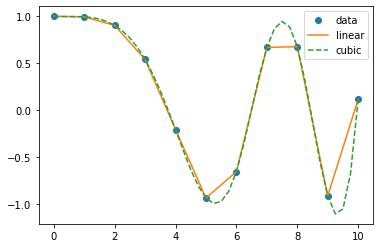

In [2]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

xnew = np.linspace(0, 10, num=41, endpoint=True)
plt.plot(x, y, 'o')
plt.plot(xnew, f(xnew), '-')
plt.plot(xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

## <span style="color:blue">Exercise</span>
This time, only a single exercise to make you familiar with the use pattern of SciPy.

1. Use a SciPy function to solve a linear regression problem of the following random data:
```
np.random.seed(12345678)
x = np.random.random(10)
y = 1.6*x + np.random.random(10)
```
Print the slope, intercept, and $R^2$ values and make a plot.
<img src="figures/2d1.png" width="600">

## <span style="color:green">Solutions</span>
Again, this is a  possible solutions.

slope: 1.9448642607472155; intercept: 0.26857823524544855; R^2: 0.7354980392850927


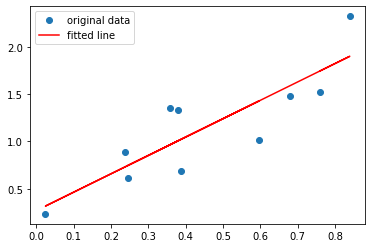

In [3]:
# 1. Use a SciPy function to solve a linear regression problem
# of the following random data [...].
# Print the slope, intercept, and $R^2$ values and make a plot
from scipy import stats

np.random.seed(12345678)
x = np.random.random(10)
y = 1.6*x + np.random.random(10)

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(f'slope: {slope}; intercept: {intercept}; R^2: {r_value**2}')

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.savefig('figures/2d1')